# IEEE Big Data Challenge

## Initial steps

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
training = pd.read_pickle("no_strings_normalized.pkl")

In [6]:
training.head()

,notified,overallseverity,timestamp_dist,start_hour,start_minute,start_second,correlatedcount,n1,n2,n3,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
0,0,-1.445723,0.097556,-0.784678,-0.868300,0.273376,-0.019448,-0.088441,-0.022528,-0.255439,...,1.455736,1.452570,0.482490,-0.022882,0.380214,-0.669235,-0.440486,-0.672570,-0.562449,-0.387374
1,0,0.803528,5.200622,-1.785669,-1.682632,-1.576298,0.985084,-0.088441,-0.022528,-0.255439,...,-0.802376,-0.780264,4.470008,0.072726,1.597586,0.782455,1.656476,0.700962,-0.562449,-0.387374
2,0,-0.321097,-0.002327,0.073315,0.876697,-1.402891,0.033725,-0.088441,-0.022528,-0.255439,...,1.253371,1.296637,0.482490,-0.022882,0.380214,0.782455,-0.440486,0.700962,1.055622,-0.387374
3,0,-0.321097,-0.201095,0.931307,0.236865,0.620190,-0.032501,-0.088441,-0.022528,-0.255439,...,-0.499916,-0.468397,-0.846683,-0.022882,0.380214,0.782455,1.656476,0.700962,1.055622,1.960148
4,0,-0.321097,-0.190178,0.073315,0.411365,-1.056077,-0.032501,-0.088441,-0.022528,-0.255439,...,0.710466,1.309908,0.482490,-0.022882,-0.837157,-0.669235,-0.440486,-0.672570,-0.562449,-0.387374


## Training dataset preparation

In [7]:
from sklearn.model_selection import train_test_split

y = training['notified']
X = training.drop('notified', axis=1)
test_size = 0.3
seed = 1011

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed )

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [20]:
predictions = knn.predict_proba(X_test)

### Evaluation

In [21]:
from sklearn import metrics
metrics.roc_auc_score(y_test, predictions[:,1])

0.7678172997462045

In [17]:
error_rate = []

# Will take some time
for i in range(1,40):
    print("Computing index: ", i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

Computing index:  1
0.08817313382365373
Computing index:  2
0.06213542987572914
Computing index:  3
0.070082001859836
Computing index:  4
0.06103643587792713
Computing index:  5
0.0630653478738693
Computing index:  6
0.05959928988080142
Computing index:  7
0.060275593879448815
Computing index:  8
0.05968382788063235
Computing index:  9
0.06052920787894158
Computing index:  10
0.05968382788063235
Computing index:  11
0.060782821878434354
Computing index:  12
0.05900752388198495
Computing index:  13
0.05976836588046327
Computing index:  14
0.0591765998816468
Computing index:  15
0.059430213881139574
Computing index:  16
0.058838447882323106
Computing index:  17
0.05926113788147772
Computing index:  18
0.058838447882323106
Computing index:  19
0.0591765998816468
Computing index:  20
0.058753909882492183
Computing index:  21
0.05909206188181588
Computing index:  22
0.05892298588215403
Computing index:  23
0.0591765998816468
Computing index:  24
0.058753909882492183
Computing index:  25
0.0

Text(0, 0.5, 'Error Rate')

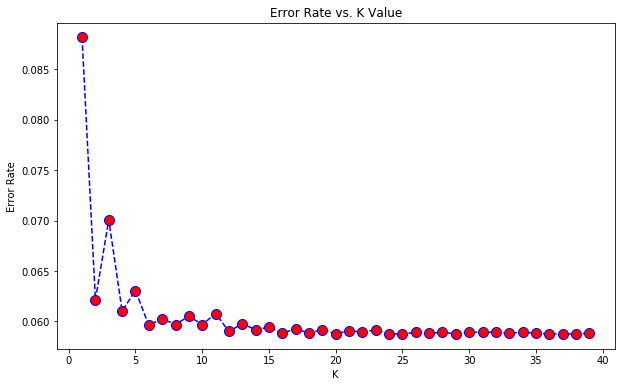

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')